In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from scipy import stats

In [2]:
# Assess correlations across the entire dataset
train_df = pd.read_csv("data/train_data.csv")
val_df = pd.read_csv("data/validation_data.csv")
df = pd.concat([train_df, val_df])

Normalising vs. standardising data
 - Standardise if normal distribution
 - Log returns are normal
 - Returns are not
 - See analysis below

# Plots

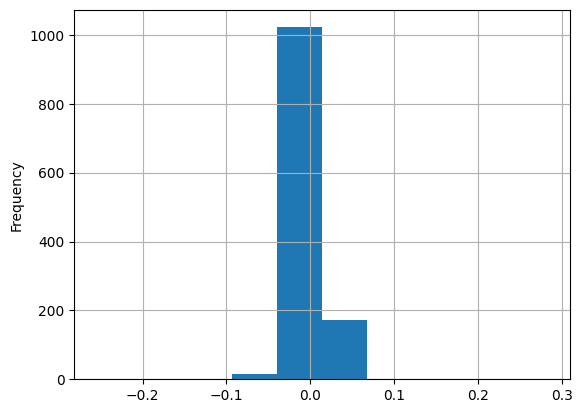

In [3]:
df["log_returns_t"].plot(kind="hist").grid()

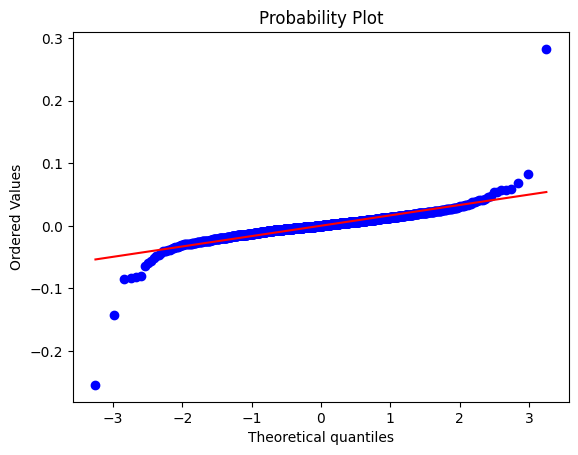

In [4]:
log_returns = df["log_returns_t"].to_numpy()

stats.probplot(log_returns, dist="norm", plot=plt)
plt.show()

# Assessment of normality.
Likelihood of tail values is essentially 0:

In [5]:
# Look at best and worst cases to assess fat tails
log_return_min = min(log_returns)
log_return_max = max(log_returns)


def standardise(x: np.ndarray, data) -> np.ndarray:
    return (x - data.mean()) / data.std()

# Standardise for inspection
log_return_min_standardised = standardise(log_return_min, log_returns)
log_return_max_standardised = standardise(log_return_max, log_returns)

log_return_min_standardised, log_return_max_standardised

(-13.187402782547656, 14.647301626142529)

In [6]:
stats.norm(0,1).pdf(log_return_min_standardised), stats.norm(0,1).pdf(log_return_max_standardised)

(6.876322708358083e-39, 1.031318802396563e-47)